# Свёрточная нейронная сеть классификатор на базе датасета Cifar10

In [ ]:
# Импортируем необходимое
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Образ модели
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 10
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [ ]:
# Загружаем дату CIFAT-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# Определение формы данных
input_shape = (img_width, img_height, img_num_channels)

In [ ]:
# Преобразуем данные в другой формат для того, чтобы ускорить обучение
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Нормализуем дату
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Создаём модель
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [ ]:
# Компилируем модель
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Подстраиваем данные
history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/10
800/800 [==============================] - 64s 78ms/step - loss: 1.6086 - accuracy: 0.4044 - val_loss: 1.3453 - val_accuracy: 0.5173
Epoch 2/10
800/800 [==============================] - 60s 75ms/step - loss: 1.2014 - accuracy: 0.5695 - val_loss: 1.2103 - val_accuracy: 0.5699
Epoch 3/10
800/800 [==============================] - 61s 76ms/step - loss: 1.0282 - accuracy: 0.6370 - val_loss: 1.0122 - val_accuracy: 0.6464
Epoch 4/10
800/800 [==============================] - 60s 75ms/step - loss: 0.8966 - accuracy: 0.6841 - val_loss: 0.9429 - val_accuracy: 0.6712
Epoch 5/10
800/800 [==============================] - 58s 73ms/step - loss: 0.7980 - accuracy: 0.7200 - val_loss: 0.8754 - val_accuracy: 0.6966
Epoch 6/10
800/800 [==============================] - 61s 77ms/step - loss: 0.7178 - accuracy: 0.7470 - val_loss: 0.8940 - val_accuracy: 0.7005
Epoch 7/10
800/800 [==============================] - 60s 75ms/step - loss: 0.6514 - accuracy: 0.7706 - val_loss: 0.8593 - val_accuracy:

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.9611536264419556 / Test accuracy: 0.7021999955177307


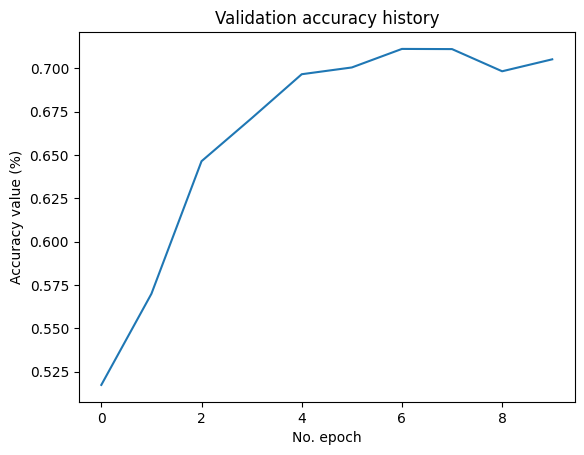

In [ ]:
# Строим график
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()